# Hypothesis Testing Exercise

In [2]:
#importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
#importing warning libraries to hide warning from code output
import warnings
warnings.filterwarnings("ignore")

# Q1. A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions

     Minitab File : Cutlets.mtw


In [3]:
#loading dataset
data = pd.read_csv('Cutlets.csv')
data.head(5)

,Unit_A,Unit_B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
#displaying columns
data.columns

Index(['Unit_A', 'Unit_B'], dtype='object')

In [5]:
#counting data value
data.value_counts()

Unit_A  Unit_B
6.4376  7.5093    1
7.2828  7.3070    1
7.0852  7.5459    1
7.1560  7.4220    1
7.1561  6.6965    1
7.2163  7.0133    1
7.2705  7.4314    1
7.2783  7.1180    1
7.2854  7.1688    1
6.9952  6.7594    1
7.3012  6.7878    1
7.3495  6.7478    1
7.3871  6.8110    1
7.3930  6.8810    1
7.3943  6.5780    1
7.4488  7.1522    1
7.0621  6.6606    1
6.9438  6.8889    1
6.5341  6.5217    1
6.8236  7.0503    1
6.5797  7.1581    1
6.5970  6.6672    1
6.6801  6.9182    1
6.6840  7.2402    1
6.7794  7.0992    1
6.8090  6.7703    1
6.8394  7.0240    1
6.9431  6.3346    1
6.8568  6.9399    1
6.8755  7.2212    1
6.9157  6.7300    1
6.9246  6.7652    1
6.9256  6.0380    1
6.9405  7.3875    1
7.5169  7.4059    1
dtype: int64

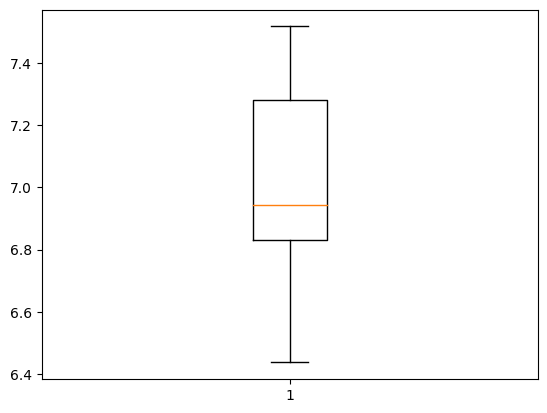

In [6]:
#analizing the (column A) data using boxplot
plt.boxplot(data["Unit_A"])
plt.show()

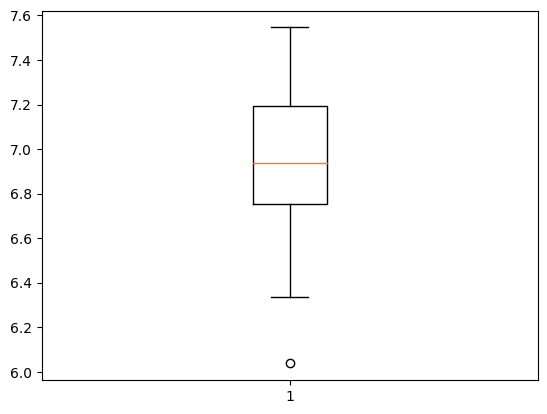

In [7]:
#analizing the (column B) data using box plot
plt.boxplot(data["Unit_B"])
plt.show()

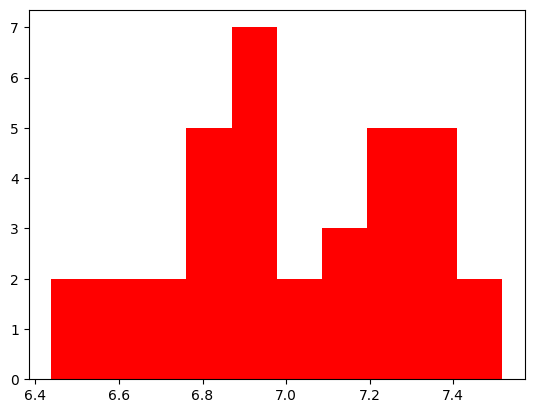

In [8]:
#plotting histogram vo visualize (column A)
plt.hist(data['Unit_A'],color='red')
plt.show()


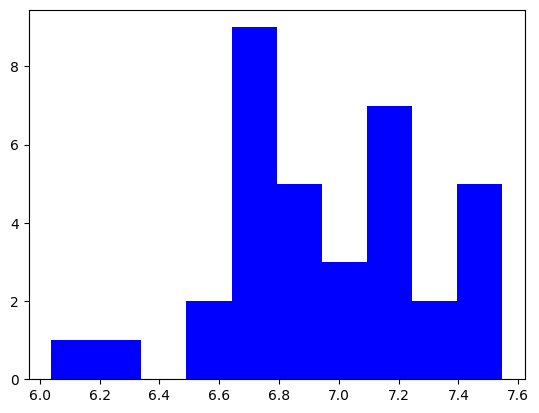

In [9]:
#plotting histogram vo visualize (column A)
plt.hist(data['Unit_B'],color='blue')
plt.show()

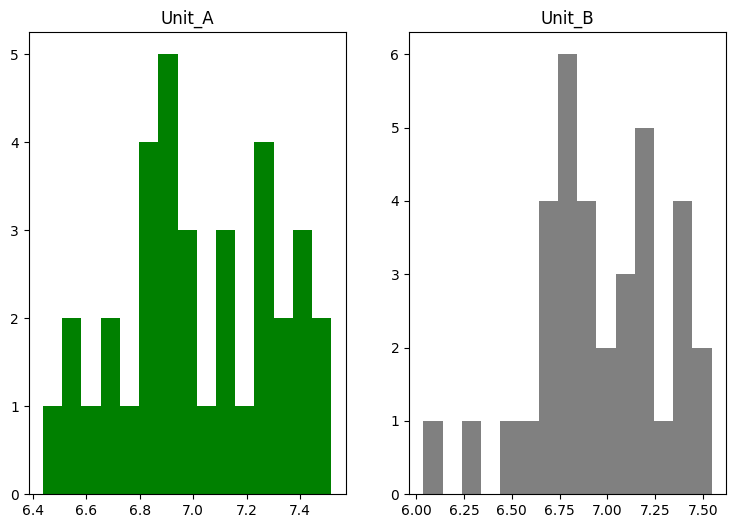

In [10]:
#plotting data in subplot using histogram
plt.subplots(figsize = (9,6) )
plt.subplot(121)
plt.hist(data['Unit_A'], bins = 15,color='green')
plt.title('Unit_A')
plt.subplot(122)
plt.hist(data['Unit_B'], bins = 15,color='grey')
plt.title('Unit_B')
plt.show()

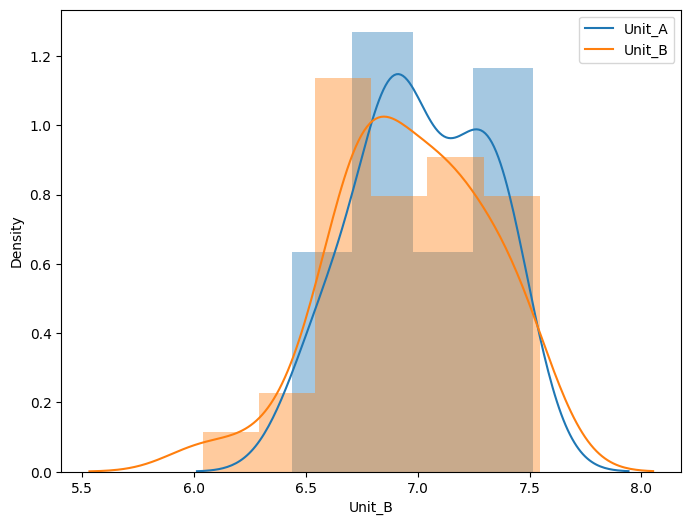

In [11]:
#plotting distplot of both column to visualize
plt.figure(figsize = (8,6))
labels = ['Unit_A', 'Unit_B']
sns.distplot(data['Unit_A'], kde = True)
sns.distplot(data['Unit_B'],hist = True)
plt.legend(labels)
plt.show()

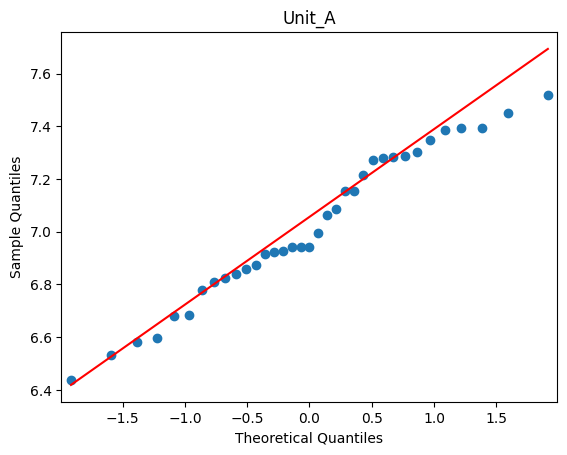

In [12]:
#plotting qq plot for Column A
sm.qqplot(data["Unit_A"], line = 'q')
plt.title('Unit_A')
plt.show()

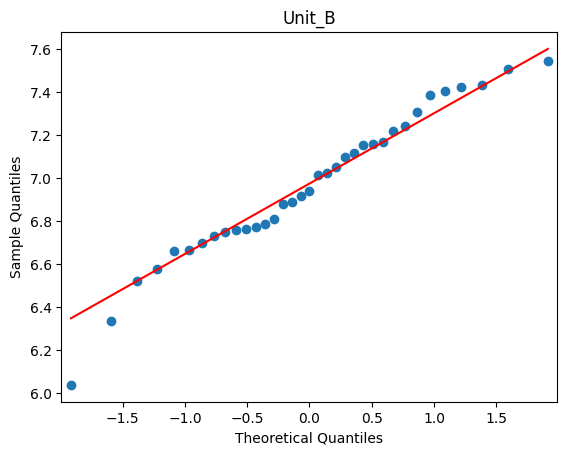

In [13]:
#plotting qq plot for Column B
sm.qqplot(data["Unit_B"], line = 'q')
plt.title('Unit_B')
plt.show()

 # we have to conduct a 2 tailed t-Test on 2 Independent samples

In [14]:
#slicing 1st column to Unit_A
unit_A = pd.Series (data.iloc[:,0])
unit_A

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit_A, dtype: float64

In [18]:
#slicing 1st column to Unit_B
unit_B = pd.Series (data.iloc[:,1])
unit_B

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit_B, dtype: float64

In [20]:
#performing 2-sample 2-tail ttest
#object = stats.ttest_ind(independent samples)([array1,array2])
p_value = stats.ttest_ind (unit_A,unit_B)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.47223947245995)

In [21]:
p_value[1]

0.47223947245995

In [22]:
Alpha=0.05
#Two tailed test so it will be Alpha/2 i.e. 0.05/2
alp = Alpha/2
alp

0.025

In [23]:
print('significance level',alp)
if p_value[1] <= alp:
    print('We reject Null hypothesis if significance difference difference between two Units A and B')
else:
    print('we fail to reject Null hypothesis')

significance level 0.025
we fail to reject Null hypothesis


#  Q2 A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 
 
    Minitab File: LabTAT.mtw



In [24]:
# load the dataset
lab_data=pd.read_csv('LabTAT.csv')
lab_data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [25]:
#getting information of data
lab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [26]:
#describing data
lab_data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [27]:
#getting mean
lab_data.mean()

Laboratory 1    178.361583
Laboratory 2    178.902917
Laboratory 3    199.913250
Laboratory 4    163.682750
dtype: float64

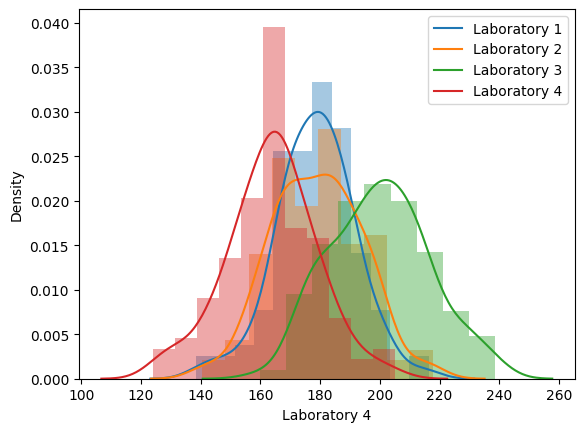

In [28]:
#visualizing data using dist plot
sns.distplot(lab_data['Laboratory 1'])
sns.distplot(lab_data['Laboratory 2'])
sns.distplot(lab_data['Laboratory 3'])
sns.distplot(lab_data['Laboratory 4'])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])
plt.show()

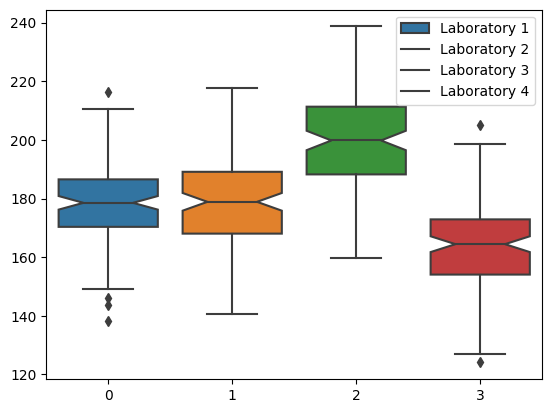

In [29]:
#visualizing data using dist plot
sns.boxplot(data=[lab_data['Laboratory 1'],lab_data['Laboratory 2'],lab_data['Laboratory 3'],lab_data['Laboratory 4']],notch=True)
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])
plt.show()

In [30]:
#converting to dataframe
alpha=0.05
lab1 = pd.DataFrame(lab_data['Laboratory 1'])
lab2 = pd.DataFrame(lab_data['Laboratory 2'])
lab3 = pd.DataFrame(lab_data['Laboratory 3'])
lab4 = pd.DataFrame(lab_data['Laboratory 4'])
print (lab1,lab2,lab3,lab4)

     Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 2
0          165.53
1          185.91
2          194.92
3          183.00
4          169.57
..            ...
115        170.66
116        183.98
117        174.54
118        197.18
119        215.17

[120 rows x 1 columns]      Laboratory 3
0          176.70
1          198.45
2          201.23
3          199.61
4          204.63
..            ...
115        193.80
116        215.25
117        203.99
118        194.52
119        221.49

[120 rows x 1 columns]      Laboratory 4
0          166.13
1          160.79
2          185.18
3          176.42
4          152.60
..            ...
115        172.68
116        177.64
117        170.27
118        150.87
119        162.21

[120 rows x 1 columns]


In [31]:
#performing hypothesis testing 
tStat, pvalue = sp.stats.f_oneway(lab1,lab2,lab3,lab4)
#print (" P-Value:{0} T-Statistic:{1}".format(pValue,t-Stats) )
print('T-Statistic:',tStat)
print('P-Value:',pvalue)

T-Statistic: [118.70421654]
P-Value: [2.11567089e-57]


In [33]:
#putting condition for reject or accept null hypothesis
if pvalue < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


# Q3. Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


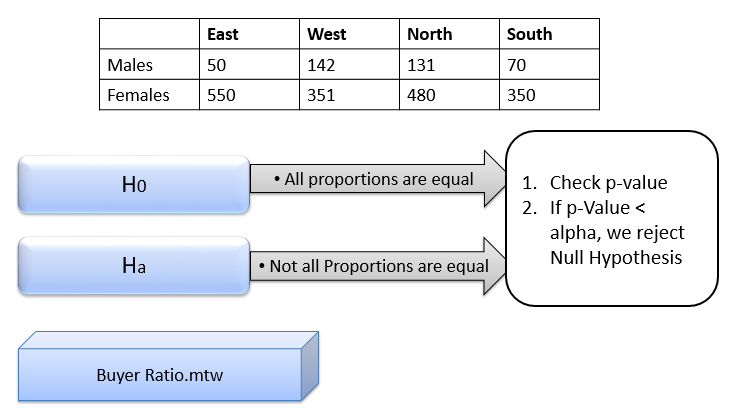# 

In [34]:
#load dataset
Buyer = pd.read_csv('BuyerRatio.csv')
Buyer.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [35]:
#describing data
Buyer.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [36]:
Buyer.mean()

East     242.5
West     832.5
North    743.5
South    410.0
dtype: float64

In [37]:

alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [ ]:

chiStats = sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')
if chiStats[1] < 0.05:
  print('we will reject null hypothesis')
else:
  print('we will accept null hypothesis')

In [ ]:

critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
                      #degree of freedom
# Find the critical value for 95% confidence*

observed_chi_val = chiStats[0]
if observed_chi_val <= critical_value:
    # observed value is not in critical area therefore we accept null hypothesis
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:
    # observed value is in critical area therefore we reject null hypothesis
    print ('Null hypothesis cannot be excepted (variables are not independent)')

# Q4.TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Minitab File: CustomerOrderForm.mtw


In [38]:
#load dataset
Customer = pd.read_csv('Costomer+OrderForm.csv')
Customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [39]:

Customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [40]:

Phillippines_value = Customer['Phillippines'].value_counts()
print(Phillippines_value)

Indonesia_value = Customer['Indonesia'].value_counts()
print(Indonesia_value)

Malta_value = Customer['Malta'].value_counts()
print(Malta_value)

India_value = Customer['India'].value_counts()
print(India_value)

Error Free    271
Defective      29
Name: Phillippines, dtype: int64
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
Error Free    269
Defective      31
Name: Malta, dtype: int64
Error Free    280
Defective      20
Name: India, dtype: int64


In [41]:
#calculating t-test and p-value
chiStats = sp.stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')


Test t=3.858961 p-value=0.277102
Interpret by p-Value


In [42]:
#putting condition for reject or accept null hypothesis
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')


we accept null hypothesis


In [43]:
#performing hypothesis testing 
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])
observed_chi_val = chiStats[0]
print('Interpret by critical value')


Interpret by critical value


In [44]:
#putting condition for reject or accept null hypothesis with reasons
if observed_chi_val <= critical_value:
       print ('Null hypothesis cannot be rejected (variables are not related)')
else:
       print ('Null hypothesis cannot be excepted (variables are not independent)')
        

Null hypothesis cannot be rejected (variables are not related)
